In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
df = pd.read_csv("MAlayalam_char_glcm_features.csv")
df.drop("fname",axis=1,inplace=True)
df.head(3)

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,17.216435,21.119725,20.889887,21.543330,0.491436,0.390284,0.389736,0.378055,0.932486,0.917179,...,5493.549025,0.804286,0.788199,0.790551,0.786816,0.896820,0.887806,0.889129,0.887027,3333
1,12.143708,15.748918,14.495192,15.859307,0.504656,0.375442,0.414030,0.371065,0.952378,0.938240,...,4044.123377,0.858505,0.843167,0.849379,0.842788,0.926556,0.918241,0.921618,0.918035,3333
2,17.216435,21.119725,20.889887,21.543330,0.491436,0.390284,0.389736,0.378055,0.932486,0.917179,...,5493.549025,0.804286,0.788199,0.790551,0.786816,0.896820,0.887806,0.889129,0.887027,3333


# **A1**

In [9]:
# Identifying non-numeric columns
x=df.drop("label",axis=1)
y=df["label"]


# K-means clustering with k = 3
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(x)

# K-means clustering with k = 5
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x)

# Checking inertia or silhouette scores for evaluating the clustering
print("K=3 Inertia:", kmeans3.inertia_)
print("K=5 Inertia:", kmeans5.inertia_)

K=3 Inertia: 3848709327.740384
K=5 Inertia: 1870409545.3298435


# **A2**

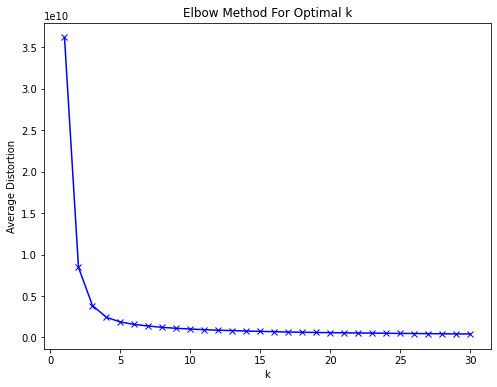

In [10]:
# Determining the ideal k value using the Elbow Method
distortions = []
K = range(1, 31)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# **A3**

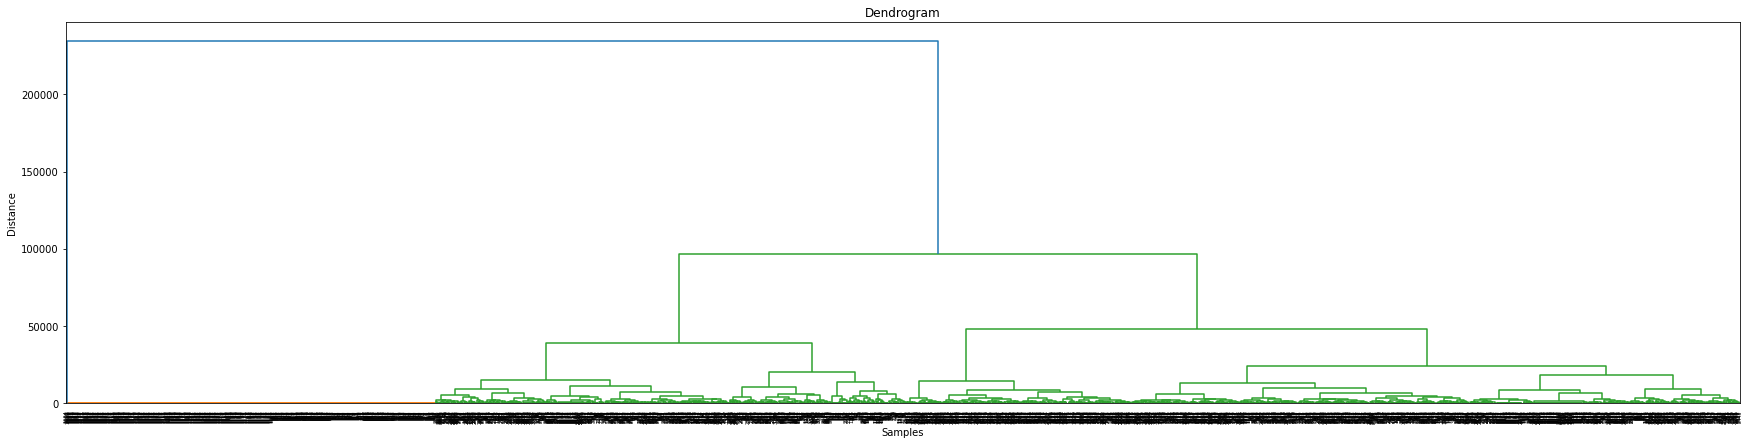

In [12]:
import scipy.cluster.hierarchy as sch

# Hierarchical clustering using Agglomerative Clustering
plt.figure(figsize=(30, 7))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# **A4**

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# Separating features and target

X = df.drop(columns=['label'])  # Features
y = df['label']  # Target



# Sequential Feature Selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=1)
selector.fit(x, y)

# Getting selected features
selected_features = x.columns[selector.support_]


In [17]:
from sklearn.decomposition import PCA

# Performing PCA on scaled data
pca = PCA(n_components=0.95)  # Captures 95% of variance
x_pca = pca.fit_transform(x)

# Getting the no.of components/features needed for 95% variance
num_features_for_95_variance = pca.n_components_

# Printting the no.of components/features needed for 95% variance
print("Number of features needed for 95% variance in PCA:", num_features_for_95_variance)

Number of features needed for 95% variance in PCA: 1


# **A5**

In [18]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# PCA with K components
K = 10  # Update with the desired number of components
pca = PCA(n_components=K)
X_pca = pca.fit_transform(x)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculating accuracy using the transformed dataset
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using transformed dataset:", accuracy)

Accuracy using transformed dataset: 0.1595744680851064
